# Implement Smoothing and Sharpening of an image using Spatial Filter

## Smoothing

### Linear Filters

#### Mean / Average FIlter

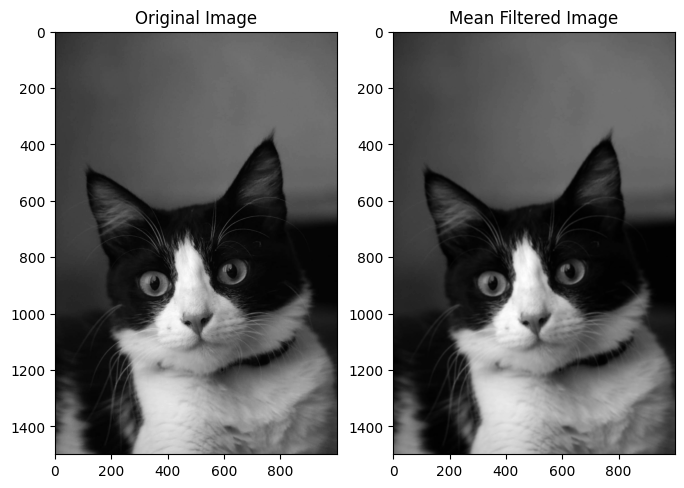

In [1]:
import cv2
import matplotlib.pyplot as plt

def mean_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

# Load the image
image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply mean filter
smoothed_image_mean = mean_filter(gray_image, kernel_size=5)
plt.figure(figsize=(8,12))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(smoothed_image_mean, cmap='gray')
plt.title('Mean Filtered Image')
plt.show()




#### Weighted Average Filter

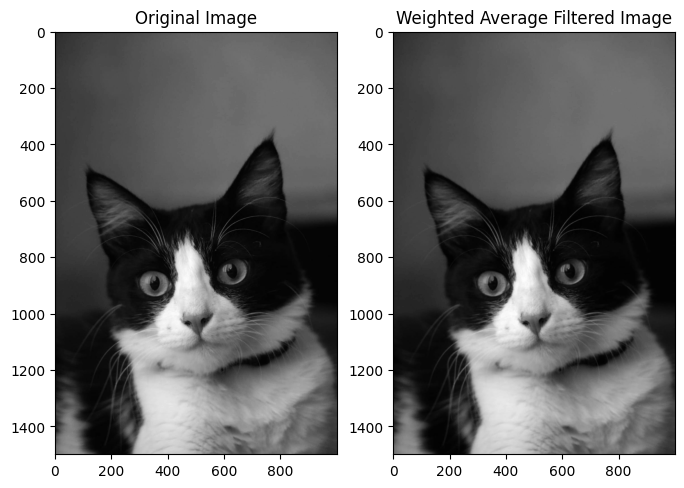

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_weighted_average_kernel(size, weights):
    normalized_weights = weights / np.sum(weights)
    return normalized_weights.reshape(size, size)

def weighted_average_filter(image, kernel):
    return cv2.filter2D(image, -1, kernel)

image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel_size = 3

weights = np.array([1, 2, 1, 2, 4, 2, 1, 2, 1])
weighted_average_kernel = create_weighted_average_kernel(kernel_size, weights)
smoothed_image_weighted_avg = weighted_average_filter(gray_image, weighted_average_kernel)

plt.figure(figsize=(8, 12))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(smoothed_image_weighted_avg, cmap='gray')
plt.title('Weighted Average Filtered Image')
plt.show()


### Non Linear Filters

#### Minimum, Maximum and Median Filters

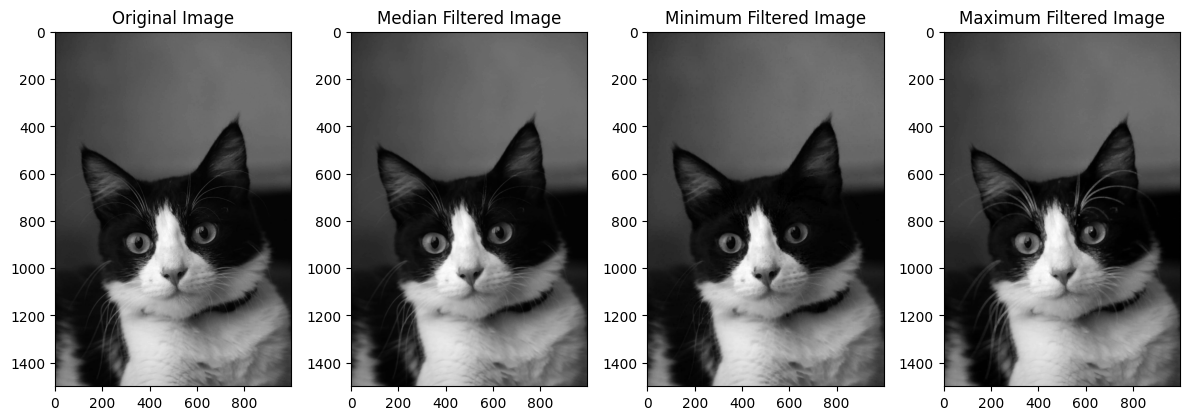

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply the median filter
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Function to apply the minimum filter
def min_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

# Function to apply the maximum filter
def max_filter(image, kernel_size):
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

# Load the image
image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel size for the filters (e.g., 5x5 kernel)
kernel_size = 5

# Apply the filters
smoothed_image_median = median_filter(gray_image, kernel_size)
smoothed_image_min = min_filter(gray_image, kernel_size)
smoothed_image_max = max_filter(gray_image, kernel_size)

# Display the images
plt.figure(figsize=(12,12))

plt.subplot(241)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(242)
plt.imshow(smoothed_image_median, cmap='gray')
plt.title('Median Filtered Image')

plt.subplot(243)
plt.imshow(smoothed_image_min, cmap='gray')
plt.title('Minimum Filtered Image')

plt.subplot(244)
plt.imshow(smoothed_image_max, cmap='gray')
plt.title('Maximum Filtered Image')

plt.tight_layout()
plt.show()


## Sharpening Filters

### Laplacian Filter (Second Derivative)

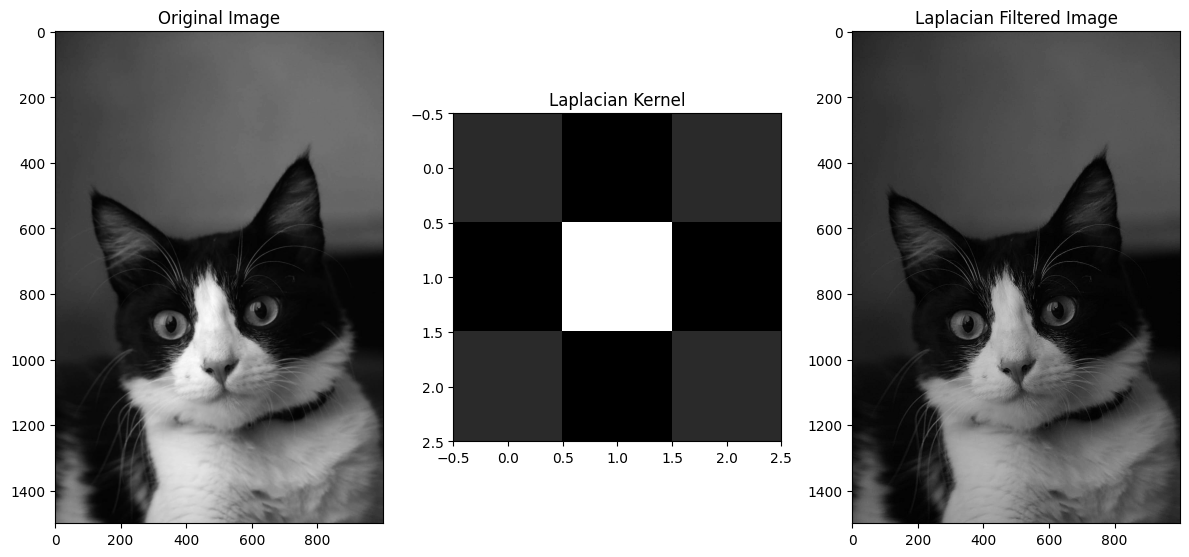

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened_image = cv2.filter2D(gray_image, -1, sharpening_kernel)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(sharpening_kernel, cmap='gray')
plt.title('Laplacian Kernel')

plt.subplot(133)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Laplacian Filtered Image')

plt.tight_layout()
plt.show()


### Sobel Operator (First Derivative)
The Sobel operator calculates the gradient magnitude in both the x and y directions to emphasize edges in the image.

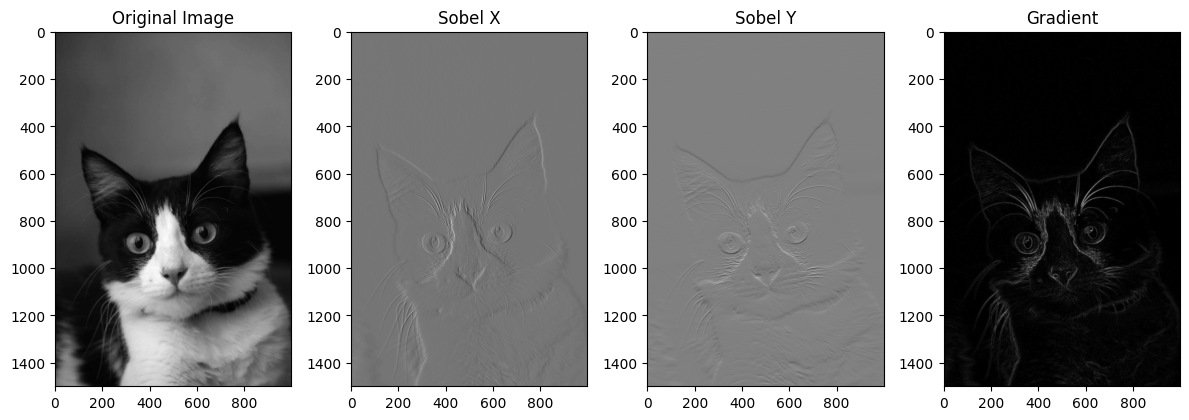

In [25]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel operator for edge enhancement
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')

plt.subplot(143)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')

plt.subplot(144)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient')

plt.tight_layout()
plt.show()



### Prewitt Operator (First Derivative)

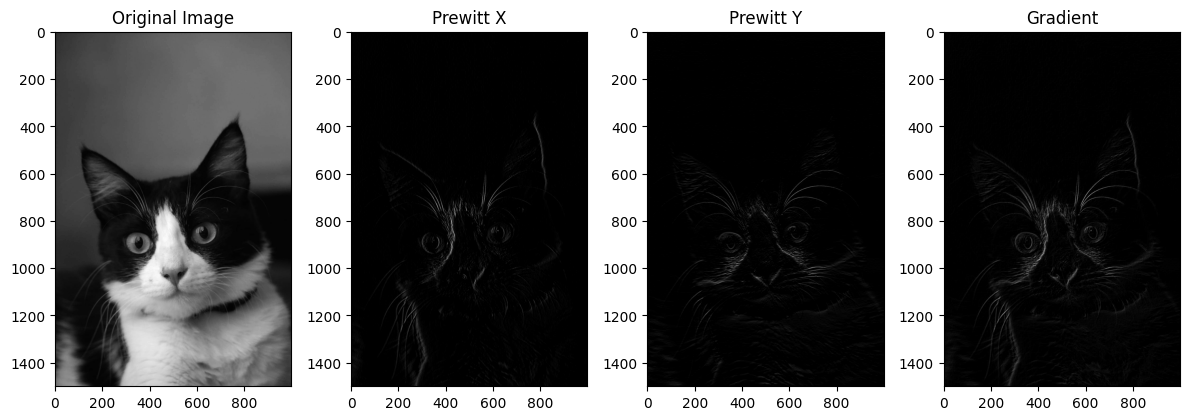

In [30]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
prewittx = cv2.filter2D(gray_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitty = cv2.filter2D(gray_image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
gradient_magnitude = cv2.addWeighted(prewittx, 0.5, prewitty, 0.5, 0)

plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(prewittx, cmap='gray')
plt.title('Prewitt X')

plt.subplot(143)
plt.imshow(prewitty, cmap='gray')
plt.title('Prewitt Y')

plt.subplot(144)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient')

plt.tight_layout()
plt.show()



### Scharr Operator (First Order Derivative):
The Scharr operator is another gradient-based edge detection operator, similar to Sobel, but with a different convolution kernel.

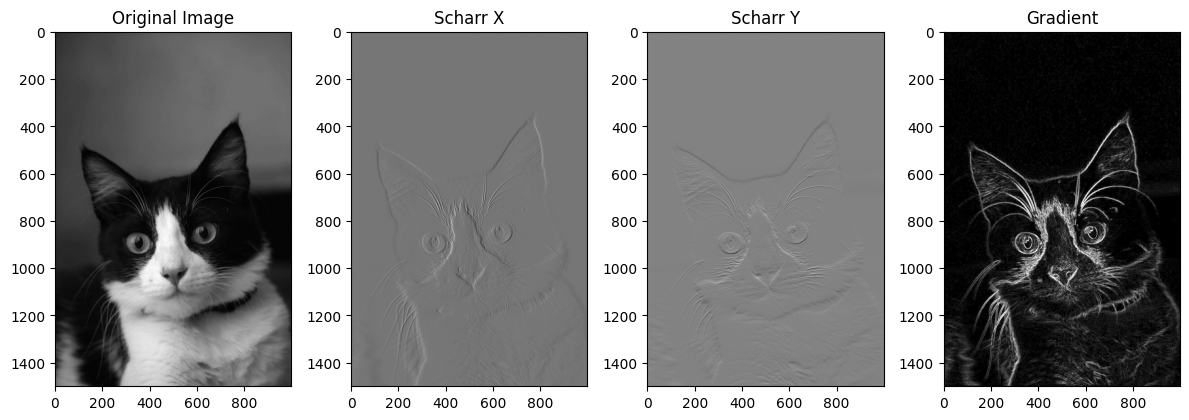

In [31]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
scharrx = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
gradient_magnitude = cv2.addWeighted(cv2.convertScaleAbs(scharrx), 0.5, cv2.convertScaleAbs(scharry), 0.5, 0)

plt.figure(figsize=(12, 6))

plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(142)
plt.imshow(scharrx, cmap='gray')
plt.title('Scharr X')

plt.subplot(143)
plt.imshow(scharry, cmap='gray')
plt.title('Scharr Y')

plt.subplot(144)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient')

plt.tight_layout()
plt.show()


### High Boosting Filter
High-Boost filtering combines the original image with a sharpened version to enhance edges. It utilizes a weighted sum of the original image and a high-pass filtered image.

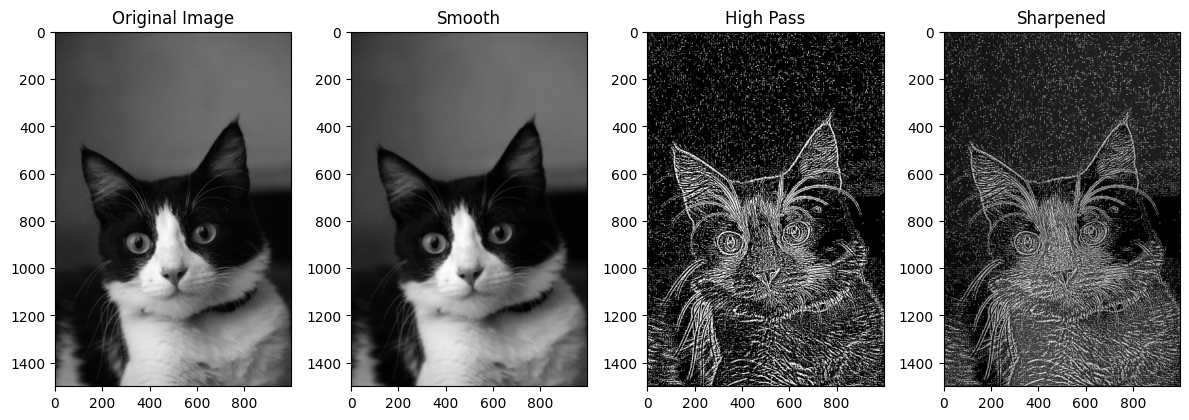

In [33]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('cat.jpeg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
smoothed_image = cv2.GaussianBlur(gray_image, (9, 9), 2)
high_pass_image = gray_image - smoothed_image
boost_factor = 2.0
sharpened_image = gray_image + boost_factor * high_pass_image

plt.figure(figsize=(12, 6))
plt.subplot(141)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.subplot(142)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smooth')
plt.subplot(143)
plt.imshow(high_pass_image , cmap='gray')
plt.title('High Pass')
plt.subplot(144)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened')

plt.tight_layout()
plt.show()
